# Exploring Localness of OSM Data
## An Analysis using the OSHDB and OHSOME

"Local Knowledge" is constituting the exceptional value of Volunteered Geographical Information and thus also considered as an important indicator of data quality. We are interested in how much local information is captured in [OpenStreetMap](https://www.openstreetmap.org) data. In this Blog post we explore the temporal evolution of mapping in OSM and the information stored in its database, by taking an explorativ look at four different cities in Germany, Nepal and the Philippines: Heidelberg, Kathmandu, Pokhara and Manila.


Heidelberg is generally considered to be well map and has experienced mapping activity over a decade for now. Mapping in Kathmandu has been impacted heavily by data created for disaster response in the aftermath of the [2015 earthquake](https://www.hotosm.org/projects/nepal_2015_earthquake_response) disaster in Nepal. This resulted in a significant increase in activity from mappers around the world. As comparison, we also will take a look at Pokhara. Pokhara is Nepals second largest city and lays approximately 200 km west of Kathmandu and belongs to the more rural part of Nepal. Manila is the capital and the economical and cultural center of the Philippines.

The image below, shows a potential classification of OSM data in regard to the information types it may contains. While buildings and road network completeness, are of interest for level 0-1 (mostly based on remote mapping), further levels 2-4 are considered to source from local knowledge.

![image info ](./data/TwitterDevelopment.jpg)

[Source: @RebeccaFirthy (twitter)](https://twitter.com/RebeccaFirthy/status/1202952838722342912)


In the following we will compare different aspects of development of OSM Data, including
* completeness of road network and buildings (level 0-1)
* exploratory analysis of local information for facilities and POIs (level 3)
* overall information richness (level 4)

Examining this evolution should give us insights on how long it takes volunteers to provide local information and how far the process is at the different locations. In order to perform this Analysis the [OHSOME API](https://heigit.org/big-spatial-data-analytics-en/ohsome/) was utilized, to access the OSM full history data. It provides different endpoints to extract and aggregate data about the objects, users and single contributions.

# Level 0-1: Roads and Buildings

## Road network
Mapping in OSM often started with roads and buildings, which can be traced from satellite imagery. In total, over 1.75 million kilometers of highway were mapped in Kathmandu. The graph shows clearly the impact of the 2015 earthquake and the road network increased by approximately 15% directly after the disaster and by 30% until today. Pokharas increase, since the earthquake, is even bigger, with doubling its mapped length of highway objects since then. Especially two spikes were noticeable, one in the direct aftermath of the earthquake and one in the year 2016. The development of Heidelbergs road network length, showed in contrast a more constant development, with a small growth rate over the last decade. Manilas road network was showing signs of still being in development, with the length increased by approximately 7% over the last year.

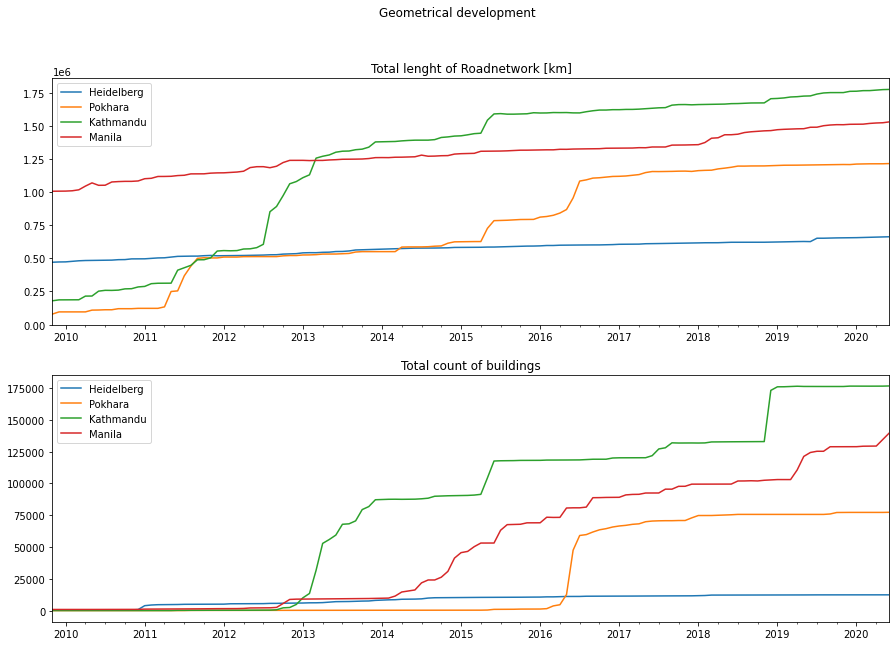

In [1]:
import src.TagSteps as plots
BBOXes = {
    "Heidelberg" : "8.6581,49.3836,8.7225,49.4363",
    "Pokhara":"83.9142,28.1693,84.0775,28.2687",
    "Kathmandu" : "85.26810609,27.66794937,85.3755574,27.75133958",
    "Manila":"120.94169186,14.55699989, 121.0261672,14.63900265"}

TIME_MONTHLY = "2009-11-01/2020-06-01/P1M"
FILTER = ["building=*","highway=*","amenity=* and name=*"]

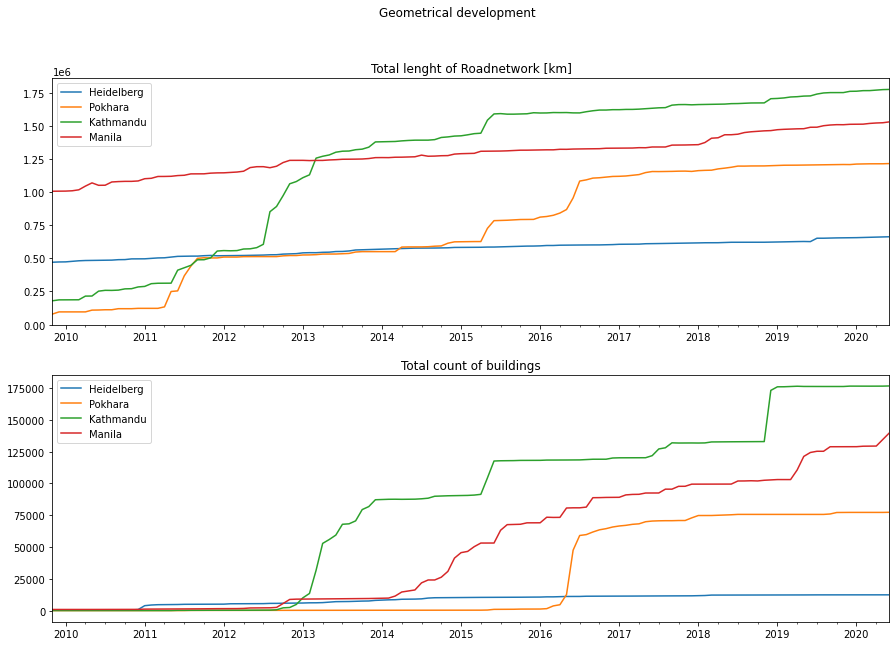

In [3]:
plots.geometry(BBOXes,TIME_MONTHLY)

## Buildings
The mapping of buildings, in comparison to the length of the road network, indicated a slightly temporally delayed development. After initial mapping of buildings in 2011, only very few buildings were mapped in Pokhara untill about one year after the earthquake. Only then the building data experienced a rapid growth over a few months in the second quarter of 2016. Kathmandu showed three main growth events: one in the end of 2012, marking the first noticeable amount of contributions, one in the directly following the earthquake in 2015 and another smaller one in 2019. Manila showed a steady data evolution, excluding one spike in the year 2019 and indicates that like the road network, the buildings are still not mapped completely.

# Level 3: Temporal Evolution of Facilities and POIs
## Facilities
The third level is characterized by containing information about facilities. Here we will take a look on the temporal development of educational facilities, access to drinking water, healthcare facilities and information about the road network (in this case bridges and tunnels).The plot shows the total count of objects belonging to the groups named above.

While Heidelberg showed a more or less constant behavior, the 3 other cities showed more irregular pattern. Manila experienced an steady increase in the last 10 years, which only further accelerated in the last one to two years. This indicates a still ongoing process of facilities and infrastructure being mapped. Kathmandu's graph shows a significant increase between 2012 and 2013 and has since experienced irregular phases of growth, slowly leveling out recently. Notable here is, that the 2015 earthquake response mapping didn't have a significant impact on this. Pokhara's development, started slow and has grown between 2016 and 2018, before leveling out afterwards.

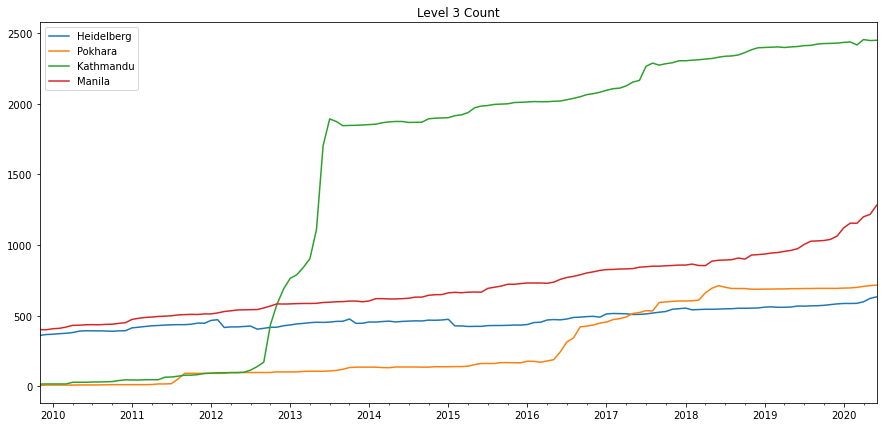

In [4]:
plots.level3(BBOXes,TIME_MONTHLY)

## Point of Interests
As point of interest (POI) we consider objects containing the tags `name` and `amenity`. The amount of those can be of interest, to understand the amount of information besides geometries, facilities and critical infrastructure. A comparison to the development of roads and buildings indicates, that the mapping of POIs followed after the mapping of essential map features like buildings and roads. In particular the development for Kathmandu and Pokhara, who experienced short periods of highway and road mapping, showed a delayed evolution in regard to POIs. This might indicate that mapping buildins and roads, and mapping POIs are two separate processes. Manila and Heidelberg, are showing at least some form of correlation between the mapping of buildings and roads and mapping of POIS. For these cities this might indicate a simultaneous process.

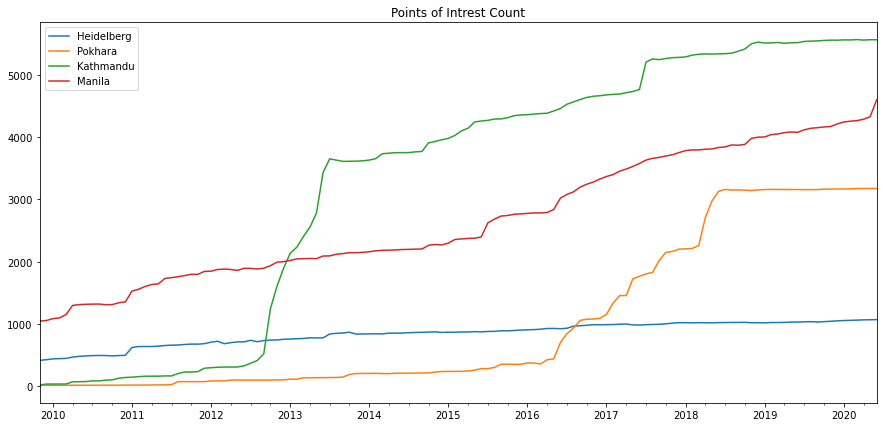

In [5]:
plots.pointsOfIntrest(BBOXes,TIME_MONTHLY)

# Level 4: Overall Information Richness
## Temporal Evolution for Buildings and Roads
Following the scheme above, the main characteristic of the fourth level is a high amount of stored information in the objects in the map. We will take a look at the number of additional tags per object.

We can clearly see, that for roads and buildings the amount of additional tag information in Heidelberg is very high. For instance, more than 50% of the buildings contain five or more tags. Manila, Kathmandu and Pokhara have a significant lower portion of buildings and street containing further information. An exeption is the road network of Manila, which shows comparable results to the ones in Heidelberg.

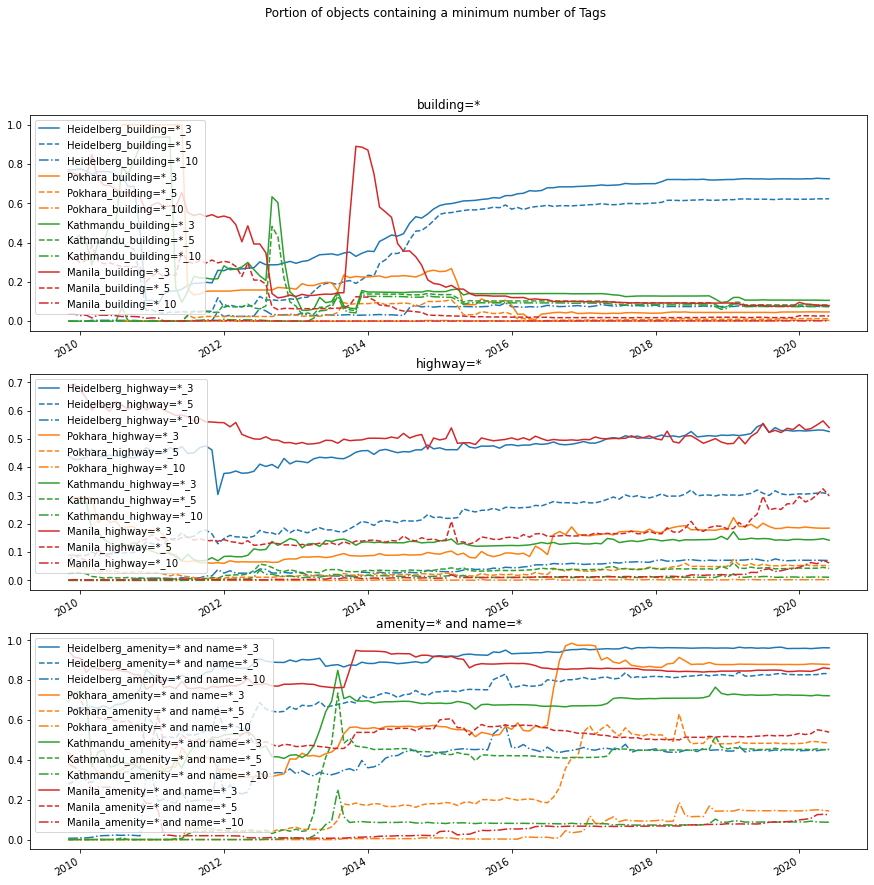

In [3]:
 x = plots.plotTagcompletness(BBOXes,FILTER,TIME_MONTHLY,[3,5,10])

## Spatial Distribution for Buildings and Roads
Exploring the spatio-temporal domain using the leaflet map below, shows that Manila and Heidelberg both showed alternating pattern of activity over a longer stretch of time.Pokhara and Kathmandu instead showed region wide morex extensive activity over short periods. 

This suggests, that Heidelberg and Manila, both had a variety of spatially separated processes, while Kathmandu and Pokhara, were affected events covering the whole cities.

In [1]:
from src.map import ChoroplethMap
BBOXes = {
    "Heidelberg" : "8.6581,49.3836,8.7225,49.4363",
    "Pokhara":"83.9142,28.1693,84.0775,28.2687",
    "Kathmandu" : "85.26810609,27.66794937,85.3755574,27.75133958",
    "Manila":"120.94169186,14.55699989, 121.0261672,14.63900265"}
TIME_MONTHLY = "2009-11-01/2020-06-01/P1M"
FILTER = ["building=*","highway=*","amenity=* and name=*"]
path_grid = r"./data/map_stored.json"
path_style = r"./data/style_stored.json"
m = ChoroplethMap()
m.loadJSON(path_style,path_grid,BBOXes)
m.renderMap()
m.getMap()

Map(center=[49.40995, 8.6903], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

# Conclusion
Kathmandu and Pokhara showed clear differences to Heidelberg, both in temporal development of buildings and roads and the amount of tags. This indicates, that a lower amount of local knowledge is contained in the data of the two cities. Manila showed at least some resemblance in comparison to the development of Heidelberg, but also contains overall less information yet and the buildings and road network are still undergoing constant mapping.

In case you are interested to learn more about OHSOME take a look at the [How to become OHSOME](http://k1z.blog.uni-heidelberg.de/?s=%22become+ohsome%22) series. Or take a look at the literature below. In case you want to take a look at a region of your choice, just add your bounding box in the cell below and rerun the cells.

### Links
[OSHDB](https://github.com/GIScience/oshdb) and [ohsome API](https://github.com/GIScience/ohsome-api) git repositorys

[Humanitarian OSM Stats](https://humstats.heigit.org/index.html?org=all) Global statistics for Humanitarian Open Street Map Team projects

[ohsome HeX- Open Street Map History Explorer](http://k1z.blog.uni-heidelberg.de/2019/02/18/openstreetmap-history-explorer-ohsomehex/)


### Liiterature

Raifer, M., Troilo, R., Kowatsch, F., Auer, M., Loos, L., Marx, S., Przybill, K., Fendrich, S., Mocnik, F.-B.& Zipf, A. (2019): OSHDB: a framework for spatio-temporal analysis of OpenStreetMap history data.Open Geospatial Data, Software and Standards 2019 4:3. https://doi.org/10.1186/s40965-019-0061-3

Auer, M.; Eckle, M.; Fendrich, S.; Griesbaum, L.; Kowatsch, F.; Marx, S.; Raifer, M.; Schott, M.; Troilo, R.; Zipf, A. (2018): Towards Using the Potential of OpenStreetMap History for Disaster Activation Monitoring. ISCRAM 2018. Rochester. NY. US.

Ludwig, C. ; Zipf, A. (2019): Exploring regional differences in the representation of urban green spaces in OpenStreetMap. Proceedings of the GeoCultGIS - Geographic and Cultural Aspects of Geo-Information: Issues and Solutions, Limassol (Cyprus)

In [2]:
import src.TagSteps as plots
from src.map import ChoroplethMap
BBOXes = {
    "Heidelberg" : "8.6581,49.3836,8.7225,49.4363",
    "Pokhara":"83.9142,28.1693,84.0775,28.2687",
    "Kathmandu" : "85.26810609,27.66794937,85.3755574,27.75133958",
    "Manila":"120.94169186,14.55699989, 121.0261672,14.63900265"}

TIME_MONTHLY = "2009-11-01/2020-06-01/P1M"
FILTER = ["building=*","highway=*","amenity=* and name=*"]
path_grid = r"./data/map_stored.json"
path_style = r"./data/style_stored.json"
m = ChoroplethMap()
m.getTimeChoroplethMap(BBOXes,FILTER,TIME_MONTHLY,size=1,tags=False)
m.renderMap()
leaflet_m = m.getMap()
leaflet_m

Map(center=[49.40995, 8.6903], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…